We have loaded the IDA2016 Challenge dataset Which is a binary classification y={'pos','neg'} problem with 170 features and 60,000 data points. The craziness here is that the class ratio is 1:59, that is, for every
positive data point, there are 59 negative data points in the training data. The challenge dataset has
a training file (aps_failure_training_set.csv) and a testing file (aps_failure_test_set.csv). We will
consider only the training file for our experimentation.

Loading the training split of IDA2016 Challenge dataset as a dataframe and performed some basic data cleaning like replacing 'na' into zeros.

In [120]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('aps_failure_training_set.csv')

df_filled = df.replace('na', 0)
df_filled = df_filled.fillna(0)

df = df_filled
# Display the first few rows of the dataframe to verify
print(df.head())

X = df.drop('class', axis=1)

# Assign labels (the 'label' column)
y = df['class']

# Verify the shapes
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

  class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698      0  2130706438    280      0      0      0      0      0   
1   neg   33058      0           0      0      0      0      0      0      0   
2   neg   41040      0         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874      0        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  

Using 'train_test_split' library from sklearn we split the train split of the dataset into 80% train and 20%split and use them for training and testing.

In [121]:
from sklearn.model_selection import train_test_split

# Assuming `X` is your feature matrix and `y` is the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 48000
Test set size: 12000


Task 1: Building Base Models using different algorithms.

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

The dataset is very large with 48,000 training samples, which is very large to train. So we use SGDClassifier to build baseline.

In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report


SGDClassifier is a much faster alternative to SVC for linear classification. It can approximate both SVM and Logistic Regression using stochastic gradient descent.

In [132]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', max_iter=2500, tol=1e-3)
sgd_clf.fit(X_train, y_train)


SGDClassifier(max_iter=2500)

In [133]:
# Make predictions on the test set
y_pred = sgd_clf.predict(X_test)


After training we evaluate on the test splits.

In [134]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9839


 In an imbalanced dataset, a model could achieve high accuracy simply by predicting the majority class. For example, if 90% of your data belongs to one class, a naive model that always predicts that class would achieve 90% accuracy, even if it never identifies the minority class.

Precision-Recall Trade-off: In many applications, increasing recall typically leads to a decrease in precision and vice versa. Depending on the problem, you may want to emphasize one metric over the other:

High Precision, Lower Recall: Useful in scenarios where false positives are costly (e.g., spam detection, fraud detection).
High Recall, Lower Precision: Important when false negatives are more critical (e.g., medical diagnoses, identifying rare events).
Using the F1 Score: The F1 score can be a good compromise when you need to balance precision and recall. It is especially useful in imbalanced datasets because it gives a better measure of the incorrectly classified cases than accuracy.

In [135]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[11658   142]
 [   51   149]]


In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         neg       1.00      0.99      0.99     11800
         pos       0.51      0.74      0.61       200

    accuracy                           0.98     12000
   macro avg       0.75      0.87      0.80     12000
weighted avg       0.99      0.98      0.99     12000



In [137]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_sgdc = precision_score(y_test, y_pred, average='macro')
recall_sgdc = recall_score(y_test, y_pred, average='macro')
f1_sgdc = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision_sgdc:.4f}')
print(f'Recall: {recall_sgdc:.4f}')
print(f'F1 Score: {f1_sgdc:.4f}')


Precision: 0.7538
Recall: 0.8665
F1 Score: 0.7994


In [138]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
scores = cross_val_score(sgd_clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean():.4f}')


Cross-validation scores: [0.9835     0.97908333 0.971      0.97916667 0.97616667]
Mean cross-validation score: 0.9778


Understanding ROC and AUC
ROC Curve:

The ROC curve is a graphical representation that illustrates the performance of a binary classifier as its discrimination threshold varies.
The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
TPR is the same as recall (the proportion of actual positives correctly identified), and FPR is the proportion of actual negatives that are incorrectly identified as positives.
AUC (Area Under the ROC Curve):

AUC quantifies the overall ability of the model to discriminate between positive and negative classes.
The AUC value ranges from 0 to 1:
0.5: No discrimination (equivalent to random guessing).
1.0: Perfect discrimination (the model correctly identifies all positives and negatives).
< 0.5: The model performs worse than random guessing.

Benefits of AUC-ROC in Imbalanced Datasets
Threshold Independence:

AUC evaluates the model across all possible classification thresholds, providing a more comprehensive view of the model's performance than metrics that depend on a single threshold (like accuracy, precision, or recall).
Performance Measure:

AUC provides a single scalar value to summarize the model's performance, which can be useful for comparison between different models or algorithms, especially in the context of class imbalance.
Focus on Discriminative Ability:

AUC emphasizes the model's ability to distinguish between the classes rather than the raw counts of predictions. This is particularly beneficial when the dataset is imbalanced, as it helps to assess how well the model identifies the minority class.

In [140]:
import numpy as np

# Assuming y_true is your true labels
y_true_numeric = np.where(y_test == 'pos', 1, 0)  # Convert 'pos' to 1 and 'neg' to 0

# Use decision_function for SVM to get probability scores
y_scores = sgd_clf.decision_function(X_test)  # This gives raw scores for SVC/SGDClassifier


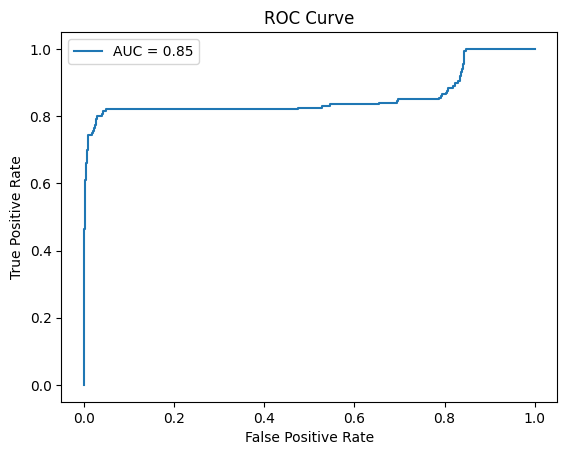

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_numeric, y_scores)
auc_score = roc_auc_score(y_true_numeric, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Let's build the Logistic Regression model for baseline with the same data.

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with more iterations and a different solver
logistic_model = LogisticRegression(solver='saga', max_iter=2000)

# Fit the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [144]:
# Evaluate performance
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred_logistic))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_logistic))

#precision, Recall and f1 score

precision_logistic = precision_score(y_test, y_pred_logistic, average='macro')
recall_logistic = recall_score(y_test, y_pred_logistic,average='macro')
f1_logistic = f1_score(y_test, y_pred_logistic,average='macro')

Logistic Regression Accuracy: 0.9908
Classification Report:
               precision    recall  f1-score   support

         neg       0.99      1.00      1.00     11800
         pos       0.76      0.65      0.70       200

    accuracy                           0.99     12000
   macro avg       0.88      0.82      0.85     12000
weighted avg       0.99      0.99      0.99     12000

Confusion Matrix:
 [[11759    41]
 [   70   130]]


We use a saga - solver algorithm used to minimize the loss function.

An extension of sag that can handle both L1 and L2 regularization.
Best for Large datasets (n_samples > 10,000).
Characteristics:
Very similar to sag, but more versatile due to support for both L1 and L2 regularization.
Efficient for sparse data (many zeros).

Let's also build Decission tree as baseline model.

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42,max_depth=10)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

tree_depth = decision_tree_model.get_depth()
print(f'Depth of the Decision Tree: {tree_depth}')


Depth of the Decision Tree: 10


max_depth is a hyper parameter of the model and we fix it after trying different values [33,25,20].

In [146]:
# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate performance
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred_tree))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_tree))

precision_tree = precision_score(y_test, y_pred_tree, average='macro')
recall_tree = recall_score(y_test, y_pred_tree, average='macro')
f1_tree = f1_score(y_test, y_pred_tree, average='macro')


Decision Tree Accuracy: 0.9912
Classification Report:
               precision    recall  f1-score   support

         neg       0.99      1.00      1.00     11800
         pos       0.78      0.67      0.72       200

    accuracy                           0.99     12000
   macro avg       0.89      0.83      0.86     12000
weighted avg       0.99      0.99      0.99     12000

Confusion Matrix:
 [[11762    38]
 [   67   133]]


Plotting Precision, Recall and F1 score for all 3 models.

In [147]:
scores={}
scores['model']=['SGDClassifier','Logistic Regression','Decision Tree']
scores['precision']=[precision_sgdc,precision_logistic,precision_tree]
scores['recall']=[recall_sgdc,recall_logistic,recall_tree]
scores['f1']=[f1_sgdc,f1_logistic,f1_tree]
scores_df=pd.DataFrame(scores)
scores_df

,model,precision,recall,f1
0,SGDClassifier,0.753836,0.866483,0.799358
1,Logistic Regression,0.877158,0.823263,0.848056
2,Decision Tree,0.886057,0.830890,0.856269


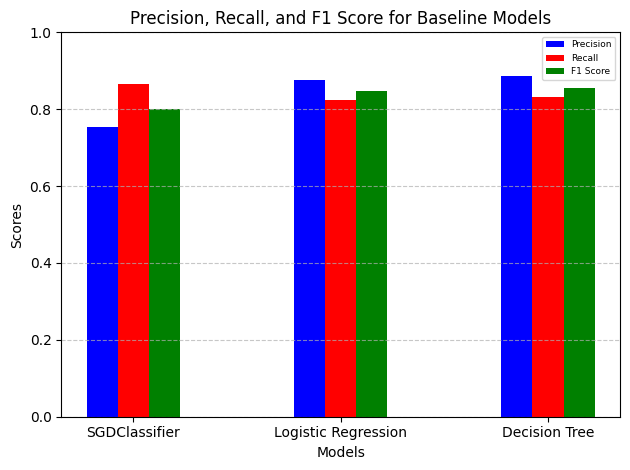

In [203]:
# Set the position of the bars on the x-axis
bar_width = 0.15
x = np.arange(len(scores_df['model']))

# Create the bar plots
plt.bar(x, scores_df['precision'], width=bar_width, label='Precision', color='blue', align='center')
plt.bar(x + bar_width, scores_df['recall'], width=bar_width, label='Recall', color='red', align='center')
plt.bar(x + 2 * bar_width, scores_df['f1'], width=bar_width, label='F1 Score', color='green', align='center')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for Baseline Models')
plt.xticks(x + bar_width, scores_df['model'])
plt.ylim(0, 1)
plt.legend(loc='upper right',prop={'size': 6.5})
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


Task 2: Approaching Class Imbalance.

a) Random Undersampling over Majority Class

Buildind SVC using rbf kernel

In [158]:
# let's try some random undersampling.
df_pos = df[df['class']=='pos']
df_neg = df[df['class']=='neg']
df_neg_us = df_neg.sample(10000)
df_us = pd.concat((df_pos,df_neg_us))
df_us.shape

(11000, 171)

In [159]:
# extract the features and labels
y = df_us['class']
X = df_us.drop(columns=['class'])
print("X dims =", X.shape)
print("Y distrib =", y.value_counts())

X dims = (11000, 170)
Y distrib = class
neg    10000
pos     1000
Name: count, dtype: int64


In [160]:
# y.values gets us (N,1) and ravel() gets us (N,) as the shapes.
ybin = y.values.ravel()
print(ybin)


['pos' 'pos' 'pos' ... 'neg' 'neg' 'neg']


In [161]:
# let's partition the data into train-test splits
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, ybin,random_state=42)

In [162]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain.astype(np.float32))
X_test_scaled = scaler.transform(Xtest)

In [163]:
model_rbf = SVC(kernel='rbf')

param_grid = {'C': [50, 100, 500, 1000],
              'gamma': [1E-5, 0.0001, 0.001]}
              #'class_weight': ['balanced', None]}
# use -1 to use all the CPUs to perform the grid search.
grid_rbf = GridSearchCV(model_rbf, param_grid, n_jobs=-1, verbose=20)

sample_weight = [500 if yt == 'pos' else 10 for yt in ytrain]
%time grid_rbf.fit(X_train_scaled, ytrain, sample_weight=sample_weight)
print(grid_rbf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 3.14 s, sys: 322 ms, total: 3.46 s
Wall time: 2min 7s
{'C': 50, 'gamma': 0.001}


In [164]:
from sklearn.model_selection import GridSearchCV

model_svc = SVC(kernel='rbf', C=50, gamma=0.001).fit(X_train_scaled, ytrain, sample_weight=sample_weight)

yfit = model_svc.predict(X_test_scaled)
print(accuracy_score(ytest, yfit))
print(classification_report(ytest, yfit))

#precision, Recall and f1 score

precision_us = precision_score(ytest, yfit, average='macro')
recall_us = recall_score(ytest, yfit, average='macro')
f1_us = f1_score(ytest, yfit, average='macro')

0.9658181818181818
              precision    recall  f1-score   support

         neg       0.98      0.98      0.98      2498
         pos       0.83      0.79      0.81       252

    accuracy                           0.97      2750
   macro avg       0.91      0.88      0.89      2750
weighted avg       0.97      0.97      0.97      2750




Implementing SGDC as a more computationally efficient approach than SVC for linear classification on large datasets.

In [165]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

sgd_clf = SGDClassifier(loss='hinge', max_iter=2500, tol=1e-3)
sgd_clf.fit(X_train_scaled, ytrain)

# Make predictions on the test set
y_pred = sgd_clf.predict(X_test_scaled)

#accuracy

accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(ytest, y_pred)
print(conf_matrix)

print(classification_report(ytest, y_pred))

precision_sgdc_us = precision_score(ytest, y_pred, average='macro')
recall_sgdc_us = recall_score(ytest, y_pred, average='macro')
f1_sgdc_us = f1_score(ytest, y_pred, average='macro')

print(f'Precision: {precision_sgdc:.4f}')
print(f'Recall: {recall_sgdc:.4f}')
print(f'F1 Score: {f1_sgdc:.4f}')

Accuracy: 0.9662
[[2475   23]
 [  70  182]]
              precision    recall  f1-score   support

         neg       0.97      0.99      0.98      2498
         pos       0.89      0.72      0.80       252

    accuracy                           0.97      2750
   macro avg       0.93      0.86      0.89      2750
weighted avg       0.96      0.97      0.96      2750

Precision: 0.7538
Recall: 0.8665
F1 Score: 0.7994


Building Logistic Regression for Undersampled Data

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


# Initialize the Logistic Regression model with more iterations and a different solver
logistic_model = LogisticRegression(solver='saga')

# Fit the model
logistic_model.fit(X_train_scaled, ytrain)

# Make predictions on the test set
y_fit_logistic = logistic_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [167]:
# Evaluate performance
accuracy_logistic = accuracy_score(ytest, y_fit_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print('Classification Report:\n', classification_report(ytest, y_fit_logistic))
print('Confusion Matrix:\n', confusion_matrix(ytest, y_fit_logistic))

#precision, Recall and f1 score

precision_logistic_us = precision_score(ytest, y_fit_logistic, average='macro')
recall_logistic_us = recall_score(ytest, y_fit_logistic, average='macro')
f1_logistic_us = f1_score(ytest, y_fit_logistic, average='macro')

Logistic Regression Accuracy: 0.9745
Classification Report:
               precision    recall  f1-score   support

         neg       0.98      0.99      0.99      2498
         pos       0.91      0.81      0.85       252

    accuracy                           0.97      2750
   macro avg       0.94      0.90      0.92      2750
weighted avg       0.97      0.97      0.97      2750

Confusion Matrix:
 [[2477   21]
 [  49  203]]


Building Decision Tree for Undersampled Data

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42,max_depth=10)

# Fit the model to the training data
decision_tree_model.fit(X_train_scaled, ytrain)

# Make predictions on the test set
y_fit_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate performance
accuracy_tree = accuracy_score(ytest, y_fit_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.4f}')
print('Classification Report:\n', classification_report(ytest, y_fit_tree))
print('Confusion Matrix:\n', confusion_matrix(ytest, y_fit_tree))

precision_tree_us = precision_score(ytest, y_fit_tree, average='macro')
recall_tree_us = recall_score(ytest, y_fit_tree, average='macro')
f1_tree_us = f1_score(ytest, y_fit_tree, average='macro')

Decision Tree Accuracy: 0.9676
Classification Report:
               precision    recall  f1-score   support

         neg       0.98      0.98      0.98      2498
         pos       0.84      0.81      0.82       252

    accuracy                           0.97      2750
   macro avg       0.91      0.89      0.90      2750
weighted avg       0.97      0.97      0.97      2750

Confusion Matrix:
 [[2458   40]
 [  49  203]]


Plots for macro average f1 score across 3 models (SVC,Logistic Regression and DT) using undersampling the majority class

In [195]:
scores_us={}
scores_us['model']=['SVC_rbf_US','SGDClassifier_US','Logistic Regression_US','Decision Tree_US']
scores_us['precision']=[precision_us,precision_sgdc_us,precision_logistic_us,precision_tree_us]
scores_us['recall']=[recall_us,recall_sgdc_us,recall_logistic_us,recall_tree_us]
scores_us['f1']=[f1_us,f1_sgdc_us,f1_logistic_us,f1_tree_us]
scores_df_us=pd.DataFrame(scores_us)
scores_df_us

,model,precision,recall,f1
0,SVC_rbf_US,0.905218,0.884851,0.894700
1,SGDClassifier_US,0.963727,0.963545,0.963555
2,Logistic Regression_US,0.943426,0.898574,0.919504
3,Decision Tree_US,0.907923,0.894771,0.901210


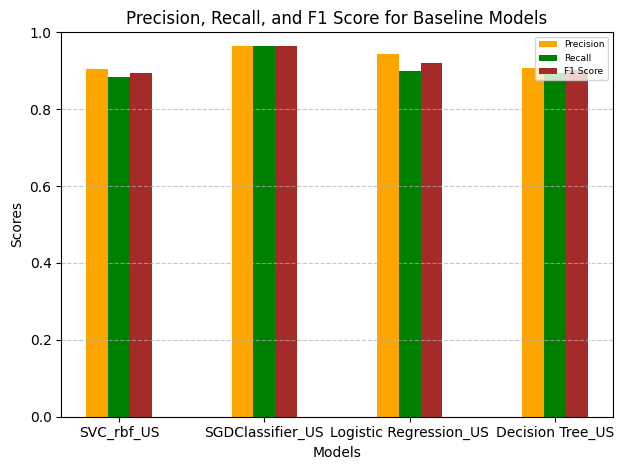

In [202]:
# Set the position of the bars on the x-axis
bar_width = 0.15
x = np.arange(len(scores_df_us['model']))

# Create the bar plots
plt.bar(x, scores_df_us['precision'], width=bar_width, label='Precision', color='orange', align='center')
plt.bar(x + bar_width, scores_df_us['recall'], width=bar_width, label='Recall', color='green', align='center')
plt.bar(x + 2 * bar_width, scores_df_us['f1'], width=bar_width, label='F1 Score', color='brown', align='center')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for Baseline Models')
plt.xticks(x + bar_width, scores_df_us['model'])
plt.ylim(0, 1)
plt.legend(loc='upper right',prop={'size': 6.5})
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

b)Random Oversampling over majority class

In [225]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Original class distribution: {pd.Series(y_train).value_counts()}")
print(f"Resampled class distribution: {pd.Series(y_resampled).value_counts()}")


Original class distribution: class
neg    47200
pos      800
Name: count, dtype: int64
Resampled class distribution: class
neg    47200
pos    47200
Name: count, dtype: int64


In [226]:
# let's partition the data into train-test splits
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_resampled, y_resampled,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain.astype(np.float32))
X_test_scaled = scaler.transform(Xtest)

Building SVC -rbf kernel

Building SVC - linear kernel - SGDC

In [227]:

sgd_clf = SGDClassifier(loss='hinge', max_iter=2500, tol=1e-3)
sgd_clf.fit(X_train_scaled, ytrain)

# Make predictions on the test set
y_pred = sgd_clf.predict(X_test_scaled)

#accuracy

accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(ytest, y_pred)
print(conf_matrix)

print(classification_report(ytest, y_pred))

precision_sgdc_os = precision_score(ytest, y_pred, average='macro')
recall_sgdc_os = recall_score(ytest, y_pred, average='macro')
f1_sgdc_os = f1_score(ytest, y_pred, average='macro')

print(f'Precision: {precision_sgdc_os:.4f}')
print(f'Recall: {recall_sgdc_os:.4f}')
print(f'F1 Score: {f1_sgdc_os:.4f}')

Accuracy: 0.9637
[[11539   279]
 [  578 11204]]
              precision    recall  f1-score   support

         neg       0.95      0.98      0.96     11818
         pos       0.98      0.95      0.96     11782

    accuracy                           0.96     23600
   macro avg       0.96      0.96      0.96     23600
weighted avg       0.96      0.96      0.96     23600

Precision: 0.9640
Recall: 0.9637
F1 Score: 0.9637


Building a Logistic Regression on oversampled data

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


# Initialize the Logistic Regression model with more iterations and a different solver
logistic_model = LogisticRegression(solver='saga')

# Fit the model
logistic_model.fit(X_train_scaled, ytrain)

# Make predictions on the test set
y_fit_logistic = logistic_model.predict(X_test_scaled)

# Evaluate performance
accuracy_logistic = accuracy_score(ytest, y_fit_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print('Classification Report:\n', classification_report(ytest, y_fit_logistic))
print('Confusion Matrix:\n', confusion_matrix(ytest, y_fit_logistic))

#precision, Recall and f1 score

precision_logistic_os = precision_score(ytest, y_fit_logistic, average='macro')
recall_logistic_os = recall_score(ytest, y_fit_logistic, average='macro')
f1_logistic_os = f1_score(ytest, y_fit_logistic, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.9446
Classification Report:
               precision    recall  f1-score   support

         neg       0.92      0.97      0.95     11818
         pos       0.97      0.92      0.94     11782

    accuracy                           0.94     23600
   macro avg       0.95      0.94      0.94     23600
weighted avg       0.95      0.94      0.94     23600

Confusion Matrix:
 [[11478   340]
 [  967 10815]]


Building DT for Overampled data

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42,max_depth=10)

# Fit the model to the training data
decision_tree_model.fit(X_train_scaled, ytrain)

# Make predictions on the test set
y_fit_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate performance
accuracy_tree = accuracy_score(ytest, y_fit_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.4f}')
print('Classification Report:\n', classification_report(ytest, y_fit_tree))
print('Confusion Matrix:\n', confusion_matrix(ytest, y_fit_tree))

precision_tree_os = precision_score(ytest, y_fit_tree, average='macro')
recall_tree_os = recall_score(ytest, y_fit_tree, average='macro')
f1_tree_os = f1_score(ytest, y_fit_tree, average='macro')

Decision Tree Accuracy: 0.9811
Classification Report:
               precision    recall  f1-score   support

         neg       0.99      0.97      0.98     11818
         pos       0.97      0.99      0.98     11782

    accuracy                           0.98     23600
   macro avg       0.98      0.98      0.98     23600
weighted avg       0.98      0.98      0.98     23600

Confusion Matrix:
 [[11477   341]
 [  104 11678]]


Plots for macro average f1 score across 3 models (SVC,Logistic Regression and DT) using overersampling the minority class

                    model  precision    recall        f1
0        SGDClassifier_OS   0.964001  0.963667  0.963679
1  Logistic Regression_OS   0.945909  0.944578  0.944575
2        Decision Tree_OS   0.981324  0.981159  0.981143


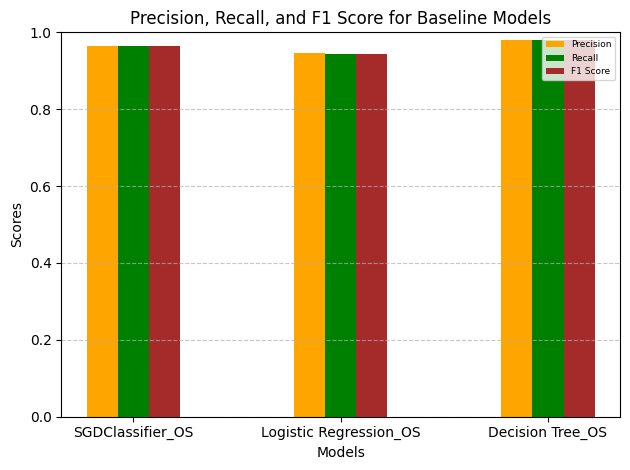

In [239]:
scores_os={}
scores_os['model']=['SGDClassifier_OS','Logistic Regression_OS','Decision Tree_OS']
scores_os['precision']=[precision_sgdc_os,precision_logistic_os,precision_tree_os]
scores_os['recall']=[recall_sgdc_os,recall_logistic_os,recall_tree_os]
scores_os['f1']=[f1_sgdc_os,f1_logistic_os,f1_tree_os]
scores_df_os=pd.DataFrame(scores_os)
print(scores_df_os)


# Set the position of the bars on the x-axis
bar_width = 0.15
x = np.arange(len(scores_df_os['model']))

# Create the bar plots
plt.bar(x, scores_df_os['precision'], width=bar_width, label='Precision', color='orange', align='center')
plt.bar(x + bar_width, scores_df_os['recall'], width=bar_width, label='Recall', color='green', align='center')
plt.bar(x + 2 * bar_width, scores_df_os['f1'], width=bar_width, label='F1 Score', color='brown', align='center')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for Baseline Models')
plt.xticks(x + bar_width, scores_df_os['model'])
plt.ylim(0, 1)
plt.legend(loc='upper right',prop={'size': 6.5})
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

c) Using class_weight which is inversely proportional to class population

Building SGDC using class_weight which automatically balance data based on distribution

In [188]:
sgdc = SGDClassifier(loss='hinge', max_iter=1000, class_weight='balanced', random_state=42)
sgdc.fit(X_train, y_train)

# Predict and evaluate SGDC
y_pred_sgdc_clsw = sgdc.predict(X_test)
print("Stochastic Gradient Descent Classifier with Class Weight:")
print(classification_report(y_test, y_pred_sgdc_clsw))

#accuracy

accuracy = accuracy_score(y_test, y_pred_sgdc_clsw)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred_sgdc_clsw)
print(conf_matrix)

print(classification_report(y_test, y_pred_sgdc_clsw))

precision_sgdc_clsw = precision_score(y_test, y_pred_sgdc_clsw, average='macro')
recall_sgdc_clsw = recall_score(y_test, y_pred_sgdc_clsw, average='macro')
f1_sgdc_clsw = f1_score(y_test, y_pred_sgdc_clsw, average='macro')

print(f'Precision: {precision_sgdc_clsw:.4f}')
print(f'Recall: {recall_sgdc_clsw:.4f}')
print(f'F1 Score: {f1_sgdc_clsw:.4f}')

Stochastic Gradient Descent Classifier with Class Weight:
              precision    recall  f1-score   support

         neg       1.00      0.91      0.95     11800
         pos       0.16      0.96      0.27       200

    accuracy                           0.91     12000
   macro avg       0.58      0.94      0.61     12000
weighted avg       0.99      0.91      0.94     12000

Accuracy: 0.9137
[[10772  1028]
 [    7   193]]
              precision    recall  f1-score   support

         neg       1.00      0.91      0.95     11800
         pos       0.16      0.96      0.27       200

    accuracy                           0.91     12000
   macro avg       0.58      0.94      0.61     12000
weighted avg       0.99      0.91      0.94     12000

Precision: 0.5787
Recall: 0.9389
F1 Score: 0.6129


Building Logistic Regression

In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with more iterations and a different solver
logistic_model = LogisticRegression(solver='saga',class_weight='balanced',random_state=42)

# Fit the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_fit_logistic = logistic_model.predict(X_test_scaled)

# Evaluate performance
accuracy_logistic = accuracy_score(y_test, y_fit_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print('Classification Report:\n', classification_report(y_test, y_fit_logistic))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_fit_logistic))

#precision, Recall and f1 score

precision_logistic_clsw = precision_score(y_test, y_fit_logistic, average='macro')
recall_logistic_clsw = recall_score(y_test, y_fit_logistic, average='macro')
f1_logistic_clsw = f1_score(y_test, y_fit_logistic, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.9715
Classification Report:
               precision    recall  f1-score   support

         neg       1.00      0.97      0.99     11800
         pos       0.36      0.94      0.53       200

    accuracy                           0.97     12000
   macro avg       0.68      0.96      0.76     12000
weighted avg       0.99      0.97      0.98     12000

Confusion Matrix:
 [[11469   331]
 [   11   189]]


Building DT

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(class_weight='balanced',random_state=42,max_depth=10)

# Fit the model to the training data
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_fit_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate performance
accuracy_tree = accuracy_score(y_test, y_fit_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.4f}')
print('Classification Report:\n', classification_report(y_test, y_fit_tree))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_fit_tree))

precision_tree_clsw = precision_score(y_test, y_fit_tree, average='macro')
recall_tree_clsw = recall_score(y_test, y_fit_tree, average='macro')
f1_tree_clsw = f1_score(y_test, y_fit_tree, average='macro')

Decision Tree Accuracy: 0.9737
Classification Report:
               precision    recall  f1-score   support

         neg       1.00      0.98      0.99     11800
         pos       0.38      0.89      0.53       200

    accuracy                           0.97     12000
   macro avg       0.69      0.93      0.76     12000
weighted avg       0.99      0.97      0.98     12000

Confusion Matrix:
 [[11506   294]
 [   22   178]]


Plots for macro average f1 score across 3 models (SVC,Logistic Regression and DT) using class_weight which automatically balance according to distribution.

                      model  precision    recall        f1
0        SGDClassifier_CLSW   0.578709  0.938941  0.612900
1  Logistic Regression_CLSW   0.681252  0.958475  0.755155
2        Decision Tree_CLSW   0.654181  0.942627  0.722559


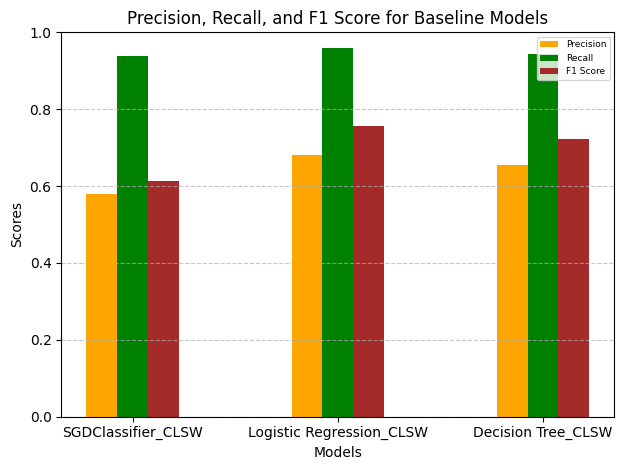

In [240]:
scores_clsw={}
scores_clsw['model']=['SGDClassifier_CLSW','Logistic Regression_CLSW','Decision Tree_CLSW']
scores_clsw['precision']=[precision_sgdc_clsw,precision_logistic_clsw,precision_tree_clsw]
scores_clsw['recall']=[recall_sgdc_clsw,recall_logistic_clsw,recall_tree_clsw]
scores_clsw['f1']=[f1_sgdc_clsw,f1_logistic_clsw,f1_tree_clsw]
scores_df_clsw=pd.DataFrame(scores_clsw)
print(scores_df_clsw)

# Set the position of the bars on the x-axis
bar_width = 0.15
x = np.arange(len(scores_df_clsw['model']))

# Create the bar plots
plt.bar(x, scores_df_clsw['precision'], width=bar_width, label='Precision', color='orange', align='center')
plt.bar(x + bar_width, scores_df_clsw['recall'], width=bar_width, label='Recall', color='green', align='center')
plt.bar(x + 2 * bar_width, scores_df_clsw['f1'], width=bar_width, label='F1 Score', color='brown', align='center')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for Baseline Models')
plt.xticks(x + bar_width, scores_df_clsw['model'])
plt.ylim(0, 1)
plt.legend(loc='upper right',prop={'size': 6.5})
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

d) Using sample_weights, where you may assign a penalty for misclassifying every data
point depending on the class it falls in.

Building SVC

In [213]:
sample_weights = np.where(y_train == 'pos', 75, 1)
sgdc = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
sgdc.fit(X_train, y_train,sample_weight=sample_weights)

# Predict and evaluate SGDC
y_pred_sgdc_smpw = sgdc.predict(X_test)
print("Stochastic Gradient Descent Classifier with Class Weight:")
print(classification_report(y_test, y_pred_sgdc_smpw))

#accuracy

accuracy = accuracy_score(y_test, y_pred_sgdc_smpw)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred_sgdc_smpw)
print(conf_matrix)

print(classification_report(y_test, y_pred_sgdc_smpw))

precision_sgdc_smpw = precision_score(y_test, y_pred_sgdc_smpw, average='macro')
recall_sgdc_smpw = recall_score(y_test, y_pred_sgdc_smpw, average='macro')
f1_sgdc_smpw = f1_score(y_test, y_pred_sgdc_smpw, average='macro')

print(f'Precision: {precision_sgdc_smpw:.4f}')
print(f'Recall: {recall_sgdc_smpw:.4f}')
print(f'F1 Score: {f1_sgdc_smpw:.4f}')

Stochastic Gradient Descent Classifier with Class Weight:
              precision    recall  f1-score   support

         neg       1.00      0.93      0.96     11800
         pos       0.19      0.94      0.32       200

    accuracy                           0.93     12000
   macro avg       0.59      0.94      0.64     12000
weighted avg       0.99      0.93      0.95     12000

Accuracy: 0.9324
[[11001   799]
 [   12   188]]
              precision    recall  f1-score   support

         neg       1.00      0.93      0.96     11800
         pos       0.19      0.94      0.32       200

    accuracy                           0.93     12000
   macro avg       0.59      0.94      0.64     12000
weighted avg       0.99      0.93      0.95     12000

Precision: 0.5947
Recall: 0.9361
F1 Score: 0.6406


Building Logistic regression

In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with more iterations and a different solver
logistic_model = LogisticRegression(solver='saga',random_state=42)
sgd_clf = SGDClassifier(loss='hinge', max_iter=2500, tol=1e-3)
sgd_clf.fit(X_train_scaled, ytrain)

# Make predictions on the test set
y_pred = sgd_clf.predict(X_test_scaled)

#accuracy

accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(ytest, y_pred)
print(conf_matrix)

print(classification_report(ytest, y_pred))

precision_sgdc_os = precision_score(ytest, y_pred, average='macro')
recall_sgdc_os = recall_score(ytest, y_pred, average='macro')
f1_sgdc_os = f1_score(ytest, y_pred, average='macro')

print(f'Precision: {precision_sgdc_os:.4f}')
print(f'Recall: {recall_sgdc_os:.4f}')
print(f'F1 Score: {f1_sgdc_os:.4f}')
sample_weights = np.where(y_train == 'pos', 75, 1)
# Fit the model
logistic_model.fit(X_train_scaled, y_train,sample_weight=sample_weights)

# Make predictions on the test set
y_fit_logistic = logistic_model.predict(X_test_scaled)

# Evaluate performance
accuracy_logistic = accuracy_score(y_test, y_fit_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print('Classification Report:\n', classification_report(y_test, y_fit_logistic))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_fit_logistic))

#precision, Recall and f1 score

precision_logistic_smpw = precision_score(y_test, y_fit_logistic, average='macro')
recall_logistic_smpw = recall_score(y_test, y_fit_logistic, average='macro')
f1_logistic_smpw = f1_score(y_test, y_fit_logistic, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.9693
Classification Report:
               precision    recall  f1-score   support

         neg       1.00      0.97      0.98     11800
         pos       0.35      0.95      0.51       200

    accuracy                           0.97     12000
   macro avg       0.67      0.96      0.75     12000
weighted avg       0.99      0.97      0.98     12000

Confusion Matrix:
 [[11442   358]
 [   10   190]]


Building DT

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42,max_depth=10)

sample_weights = np.where(y_train == 'pos', 75, 1)
# Fit the model to the training data
decision_tree_model.fit(X_train_scaled, y_train,sample_weight=sample_weights)

# Make predictions on the test set
y_fit_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate performance
accuracy_tree = accuracy_score(y_test, y_fit_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.4f}')
print('Classification Report:\n', classification_report(y_test, y_fit_tree))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_fit_tree))

precision_tree_smpw = precision_score(y_test, y_fit_tree, average='macro')
recall_tree_smpw = recall_score(y_test, y_fit_tree, average='macro')
f1_tree_smpw = f1_score(y_test, y_fit_tree, average='macro')

Decision Tree Accuracy: 0.9645
Classification Report:
               precision    recall  f1-score   support

         neg       1.00      0.97      0.98     11800
         pos       0.31      0.92      0.46       200

    accuracy                           0.96     12000
   macro avg       0.65      0.94      0.72     12000
weighted avg       0.99      0.96      0.97     12000

Confusion Matrix:
 [[11390   410]
 [   16   184]]


Plots for macro average f1 score across 3 models (SVC,Logistic Regression and DT) using sample_weights, where you may assign a penalty for misclassifying every data point depending on the class it falls in

                      model  precision    recall        f1
0        SGDClassifier_smpw   0.594693  0.936144  0.640608
1  Logistic Regression_smpw   0.672921  0.959831  0.746097
2        Decision Tree_smpw   0.654181  0.942627  0.722559


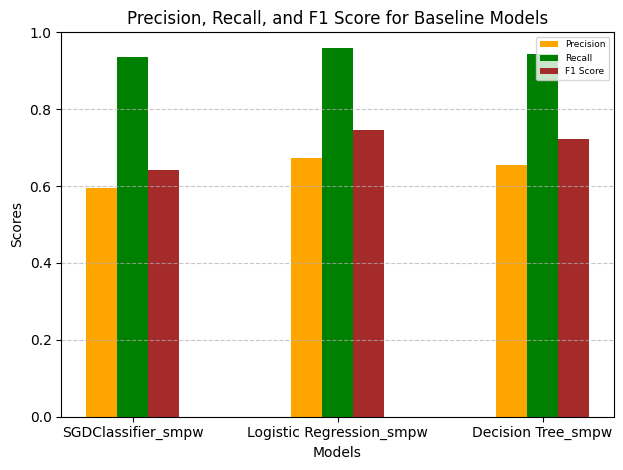

In [241]:
scores_smpw={}
scores_smpw['model']=['SGDClassifier_smpw','Logistic Regression_smpw','Decision Tree_smpw']
scores_smpw['precision']=[precision_sgdc_smpw,precision_logistic_smpw,precision_tree_smpw]
scores_smpw['recall']=[recall_sgdc_smpw,recall_logistic_smpw,recall_tree_smpw]
scores_smpw['f1']=[f1_sgdc_smpw,f1_logistic_smpw,f1_tree_smpw]
scores_df_smpw=pd.DataFrame(scores_smpw)
print(scores_df_smpw)

# Set the position of the bars on the x-axis
bar_width = 0.15
x = np.arange(len(scores_df_smpw['model']))

# Create the bar plots
plt.bar(x, scores_df_smpw['precision'], width=bar_width, label='Precision', color='orange', align='center')
plt.bar(x + bar_width, scores_df_smpw['recall'], width=bar_width, label='Recall', color='green', align='center')
plt.bar(x + 2 * bar_width, scores_df_smpw['f1'], width=bar_width, label='F1 Score', color='brown', align='center')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for Baseline Models')
plt.xticks(x + bar_width, scores_df_smpw['model'])
plt.ylim(0, 1)
plt.legend(loc='upper right',prop={'size': 6.5})
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

e) Creative approach to handle imbalanced data

SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE is an advanced oversampling technique that generates synthetic samples for the minority class rather than duplicating existing samples. It works by selecting a data point from the minority class and creating new points in the feature space between the chosen point and its nearest neighbors.

In [233]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Original class distribution: {pd.Series(y_train).value_counts()}")
print(f"SMOTE Resampled class distribution: {pd.Series(y_smote).value_counts()}")


Original class distribution: class
neg    47200
pos      800
Name: count, dtype: int64
SMOTE Resampled class distribution: class
neg    47200
pos    47200
Name: count, dtype: int64


Building SVC

In [234]:
# let's partition the data into train-test splits
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_smote, y_smote,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain.astype(np.float32))
X_test_scaled = scaler.transform(Xtest)

sgd_clf = SGDClassifier(loss='hinge', max_iter=2500, tol=1e-3)
sgd_clf.fit(X_train_scaled, ytrain)

# Make predictions on the test set
y_pred = sgd_clf.predict(X_test_scaled)

#accuracy

accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(ytest, y_pred)
print(conf_matrix)

print(classification_report(ytest, y_pred))

precision_sgdc_smote = precision_score(ytest, y_pred, average='macro')
recall_sgdc_smote = recall_score(ytest, y_pred, average='macro')
f1_sgdc_smote = f1_score(ytest, y_pred, average='macro')

print(f'Precision: {precision_sgdc_smote:.4f}')
print(f'Recall: {recall_sgdc_smote:.4f}')
print(f'F1 Score: {f1_sgdc_smote:.4f}')

Accuracy: 0.9695
[[11526   292]
 [  428 11354]]
              precision    recall  f1-score   support

         neg       0.96      0.98      0.97     11818
         pos       0.97      0.96      0.97     11782

    accuracy                           0.97     23600
   macro avg       0.97      0.97      0.97     23600
weighted avg       0.97      0.97      0.97     23600

Precision: 0.9696
Recall: 0.9695
F1 Score: 0.9695


Building Logistic Regression

In [230]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


# Initialize the Logistic Regression model with more iterations and a different solver
logistic_model = LogisticRegression(solver='saga')

# Fit the model
logistic_model.fit(X_train_scaled, ytrain)

# Make predictions on the test set
y_fit_logistic = logistic_model.predict(X_test_scaled)

# Evaluate performance
accuracy_logistic = accuracy_score(ytest, y_fit_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print('Classification Report:\n', classification_report(ytest, y_fit_logistic))
print('Confusion Matrix:\n', confusion_matrix(ytest, y_fit_logistic))

#precision, Recall and f1 score

precision_logistic_smote = precision_score(ytest, y_fit_logistic, average='macro')
recall_logistic_smote = recall_score(ytest, y_fit_logistic, average='macro')
f1_logistic_smote = f1_score(ytest, y_fit_logistic, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.9498
Classification Report:
               precision    recall  f1-score   support

         neg       0.93      0.97      0.95     11818
         pos       0.97      0.93      0.95     11782

    accuracy                           0.95     23600
   macro avg       0.95      0.95      0.95     23600
weighted avg       0.95      0.95      0.95     23600

Confusion Matrix:
 [[11497   321]
 [  864 10918]]


Building DT

In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42,max_depth=10)

# Fit the model to the training data
decision_tree_model.fit(X_train_scaled, ytrain)

# Make predictions on the test set
y_fit_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate performance
accuracy_tree = accuracy_score(ytest, y_fit_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.4f}')
print('Classification Report:\n', classification_report(ytest, y_fit_tree))
print('Confusion Matrix:\n', confusion_matrix(ytest, y_fit_tree))

precision_tree_smote = precision_score(ytest, y_fit_tree, average='macro')
recall_tree_smote = recall_score(ytest, y_fit_tree, average='macro')
f1_tree_smote = f1_score(ytest, y_fit_tree, average='macro')

Decision Tree Accuracy: 0.9831
Classification Report:
               precision    recall  f1-score   support

         neg       0.99      0.98      0.98     11818
         pos       0.98      0.99      0.98     11782

    accuracy                           0.98     23600
   macro avg       0.98      0.98      0.98     23600
weighted avg       0.98      0.98      0.98     23600

Confusion Matrix:
 [[11572   246]
 [  152 11630]]


Plots for macro average f1 score across 3 models (SVC,Logistic Regression and DT) using creative synthetic minority oversampling technique.

                       model  precision    recall        f1
0        SGDClassifier_smote   0.969562  0.969483  0.969490
1  Logistic Regression_smote   0.950771  0.949753  0.949758
2        Decision Tree_smote   0.983161  0.983142  0.983135


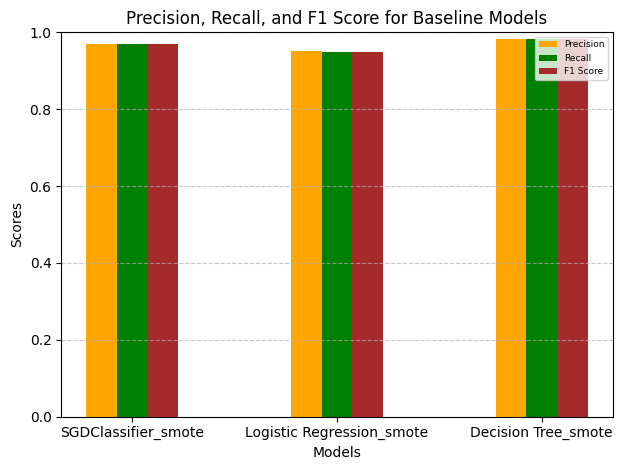

In [242]:
scores_smote={}
scores_smote['model']=['SGDClassifier_smote','Logistic Regression_smote','Decision Tree_smote']
scores_smote['precision']=[precision_sgdc_smote,precision_logistic_smote,precision_tree_smote]
scores_smote['recall']=[recall_sgdc_smote,recall_logistic_smote,recall_tree_smote]
scores_smote['f1']=[f1_sgdc_smote,f1_logistic_smote,f1_tree_smote]
scores_df_smote=pd.DataFrame(scores_smote)
print(scores_df_smote)

# Set the position of the bars on the x-axis
bar_width = 0.15
x = np.arange(len(scores_df_smote['model']))

# Create the bar plots
plt.bar(x, scores_df_smote['precision'], width=bar_width, label='Precision', color='orange', align='center')
plt.bar(x + bar_width, scores_df_smote['recall'], width=bar_width, label='Recall', color='green', align='center')
plt.bar(x + 2 * bar_width, scores_df_smote['f1'], width=bar_width, label='F1 Score', color='brown', align='center')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for Baseline Models')
plt.xticks(x + bar_width, scores_df_smote['model'])
plt.ylim(0, 1)
plt.legend(loc='upper right',prop={'size': 6.5})
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

Thus imbalanced data can be handled better by oversampling techniques for this particular dataset has classification performance metric (macro average F_1) of the hacked classifiers is better than the baseline classifiers